# Approximating Runge Function with Cubic Splines

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import BarycentricInterpolator


## Define Runge Function

In [71]:
runge_function = lambda x: 1 / (1 +  25*x**2)

## Spline Interpolation

In [77]:
def Spline_interpolation_and_plot(max_degree=50000, tol=1e-10, bc_type='not-a-knot'):
        # Define the error tolerance
        tolerance = tol

        # Define the interval and dense evaluation points
        x_dense = np.linspace(-1, 1, 100000)
        y_true = runge_function(x_dense)

        max_errors = []
        for degree in range (2, max_degree+1):
            x_nodes = np.linspace(-1, 1, degree+1) # Uniformly N+1 spaced nodes
            y_nodes = runge_function(x_nodes)
            
            cs = CubicSpline(x_nodes, y_nodes, bc_type=bc_type)
            y_spline = cs(x_dense)

            max_error = np.max(np.abs(y_true - y_spline))
            max_errors.append(max_error)
            if max_error < tolerance:
                break
            if degree == max_degree:
                print(f"Warning: Maximum number of nodes {max_degree} reached without meeting tolerance.")

        N = degree
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        plt.plot(x_dense, y_true, label='Runge Function', color='blue')
        plt.plot(x_dense, y_spline, label=f'Cubic Spline ({bc_type})', color='orange')
        plt.scatter(x_nodes, y_nodes, color='red', label='Nodes')
        plt.title(f'Cubic Spline ({bc_type}) Interpolation with N={N}')
        plt.grid()
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(2, N+1), max_errors)
        plt.yscale('log')
        plt.title('Maximum Error vs N')
        plt.grid()
        plt.show()

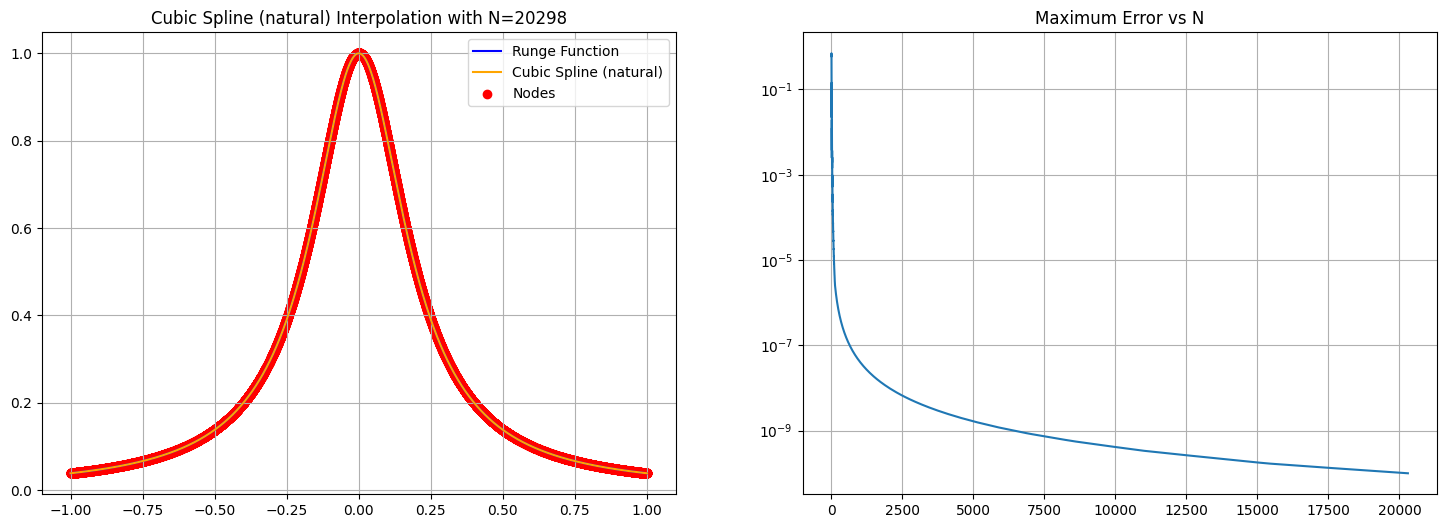

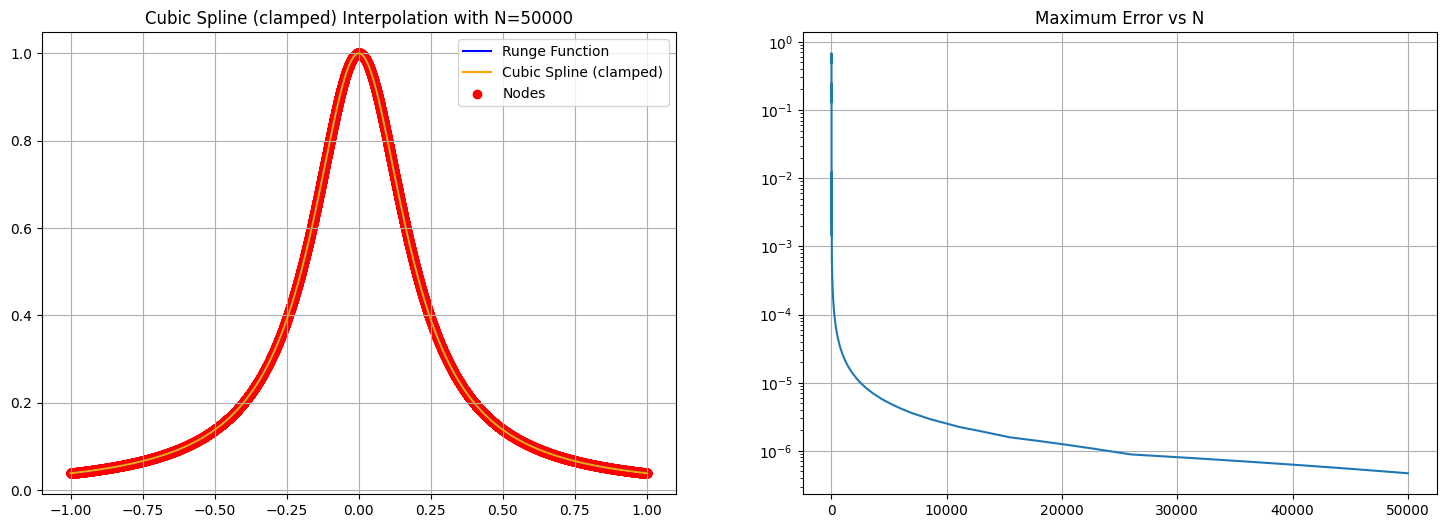

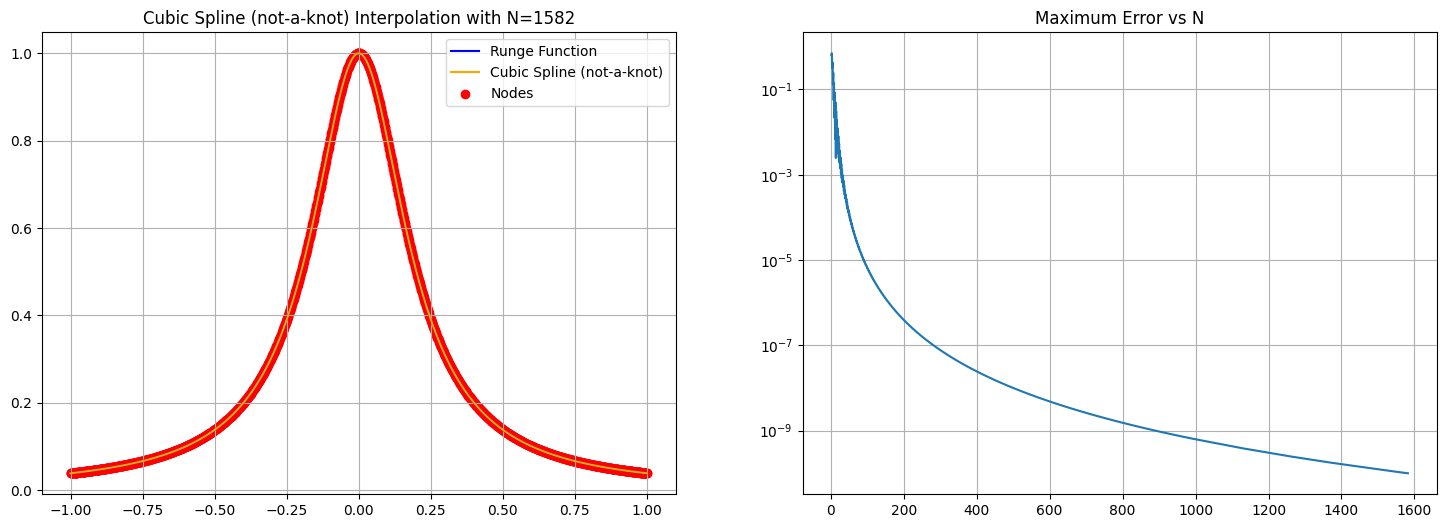

In [78]:
Spline_interpolation_and_plot(tol=1e-10, bc_type='natural')
Spline_interpolation_and_plot(tol=1e-10, bc_type='clamped')
Spline_interpolation_and_plot(tol=1e-10) # not-a-knot by default

### Observation
With not-a-knot boundary condition, we can use less splines to attain the better error.

## Interpolation (Chebyshev nodes)

In [74]:
def chebyshev_nodes_2(n, a=-1, b=1):
    k = np.arange(n)
    return np.cos(np.pi * k/(n-1))

In [75]:
def Polynomial_interpolation_and_plot_chebyshev(max_degree=10000, tol=1e-10):
        # Define the error tolerance
        tolerance = tol

        # Define the interval and dense evaluation points
        x_dense = np.linspace(-1, 1, 100000)
        y_true = runge_function(x_dense)

        max_errors = []
        for degree in range (2, max_degree+1):
            x_nodes = chebyshev_nodes_2(degree+1, -1, 1) # Chebyshev nodes
            y_nodes = runge_function(x_nodes)
            
            interp = BarycentricInterpolator(x_nodes, y_nodes)
            y_interp = interp(x_dense)

            max_error = np.max(np.abs(y_true - y_interp))
            max_errors.append(max_error)
            if max_error < tolerance:
                break
            if degree == max_degree:
                print(f"Warning: Maximum degree {max_degree} reached without meeting tolerance.")

        N = degree
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 2, 1)
        plt.plot(x_dense, y_true, label='Runge Function', color='blue')
        plt.plot(x_dense, y_interp, label=f'Interpolation', color='orange')
        plt.scatter(x_nodes, y_nodes, color='red', label='Nodes')
        plt.title(f'Polynomial interpolation with {N} second kind Chebyshev nodes')
        plt.grid()
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(2, N+1), max_errors)
        plt.yscale('log')
        plt.grid()
        plt.title('Maximum Error vs N')
        plt.show()

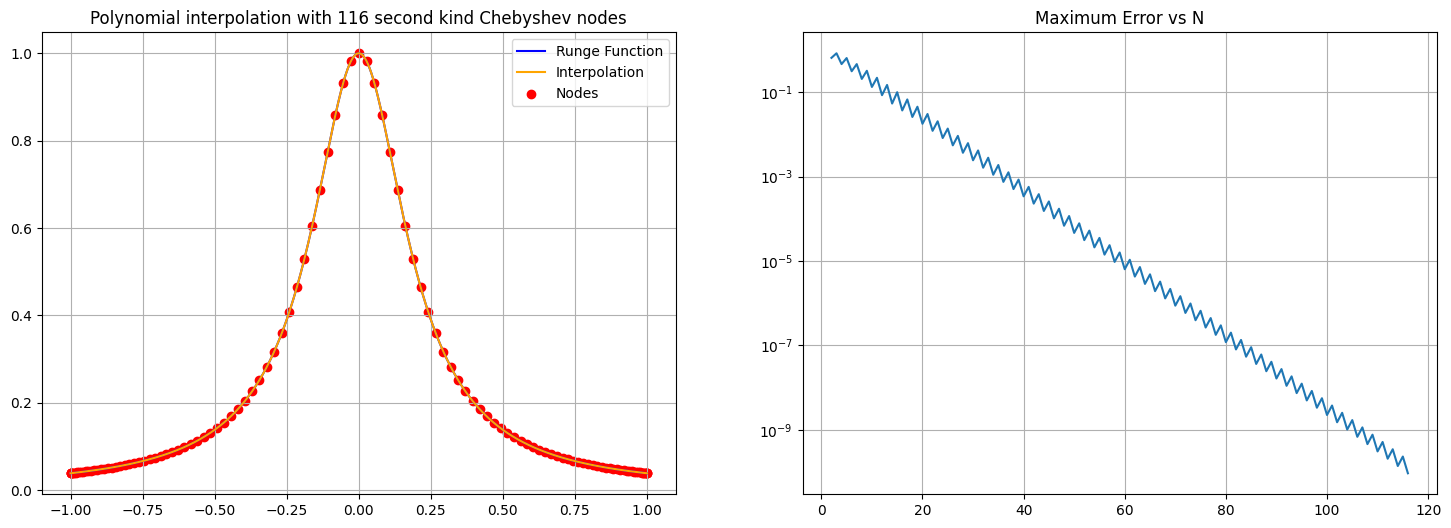

In [76]:
Polynomial_interpolation_and_plot_chebyshev(tol=1e-10)